In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import re

In [2]:
dataset_path = 'Dataset'

In [3]:
train_labels = pd.read_csv(os.path.join(dataset_path, 'Index', 'Train.csv'))
print(train_labels.head())

   age  gender         filename  \
0    3       1  00013_00M19.JPG   
1    3       1  00013_01M19.JPG   
2    3       1  00013_02M19.JPG   
3    3       1  00022_03M19.JPG   
4    4       1  00022_04M20.JPG   

                                            filepath  
0  /kaggle/input/morph/Dataset/Images/Train/00013...  
1  /kaggle/input/morph/Dataset/Images/Train/00013...  
2  /kaggle/input/morph/Dataset/Images/Train/00013...  
3  /kaggle/input/morph/Dataset/Images/Train/00022...  
4  /kaggle/input/morph/Dataset/Images/Train/00022...  


In [4]:
def extract_person_id(filename):
    match = re.match(r"(\d+)_", filename)
    return match.group(1) if match else filename

train_labels["person_id"] = train_labels["filename"].apply(extract_person_id)

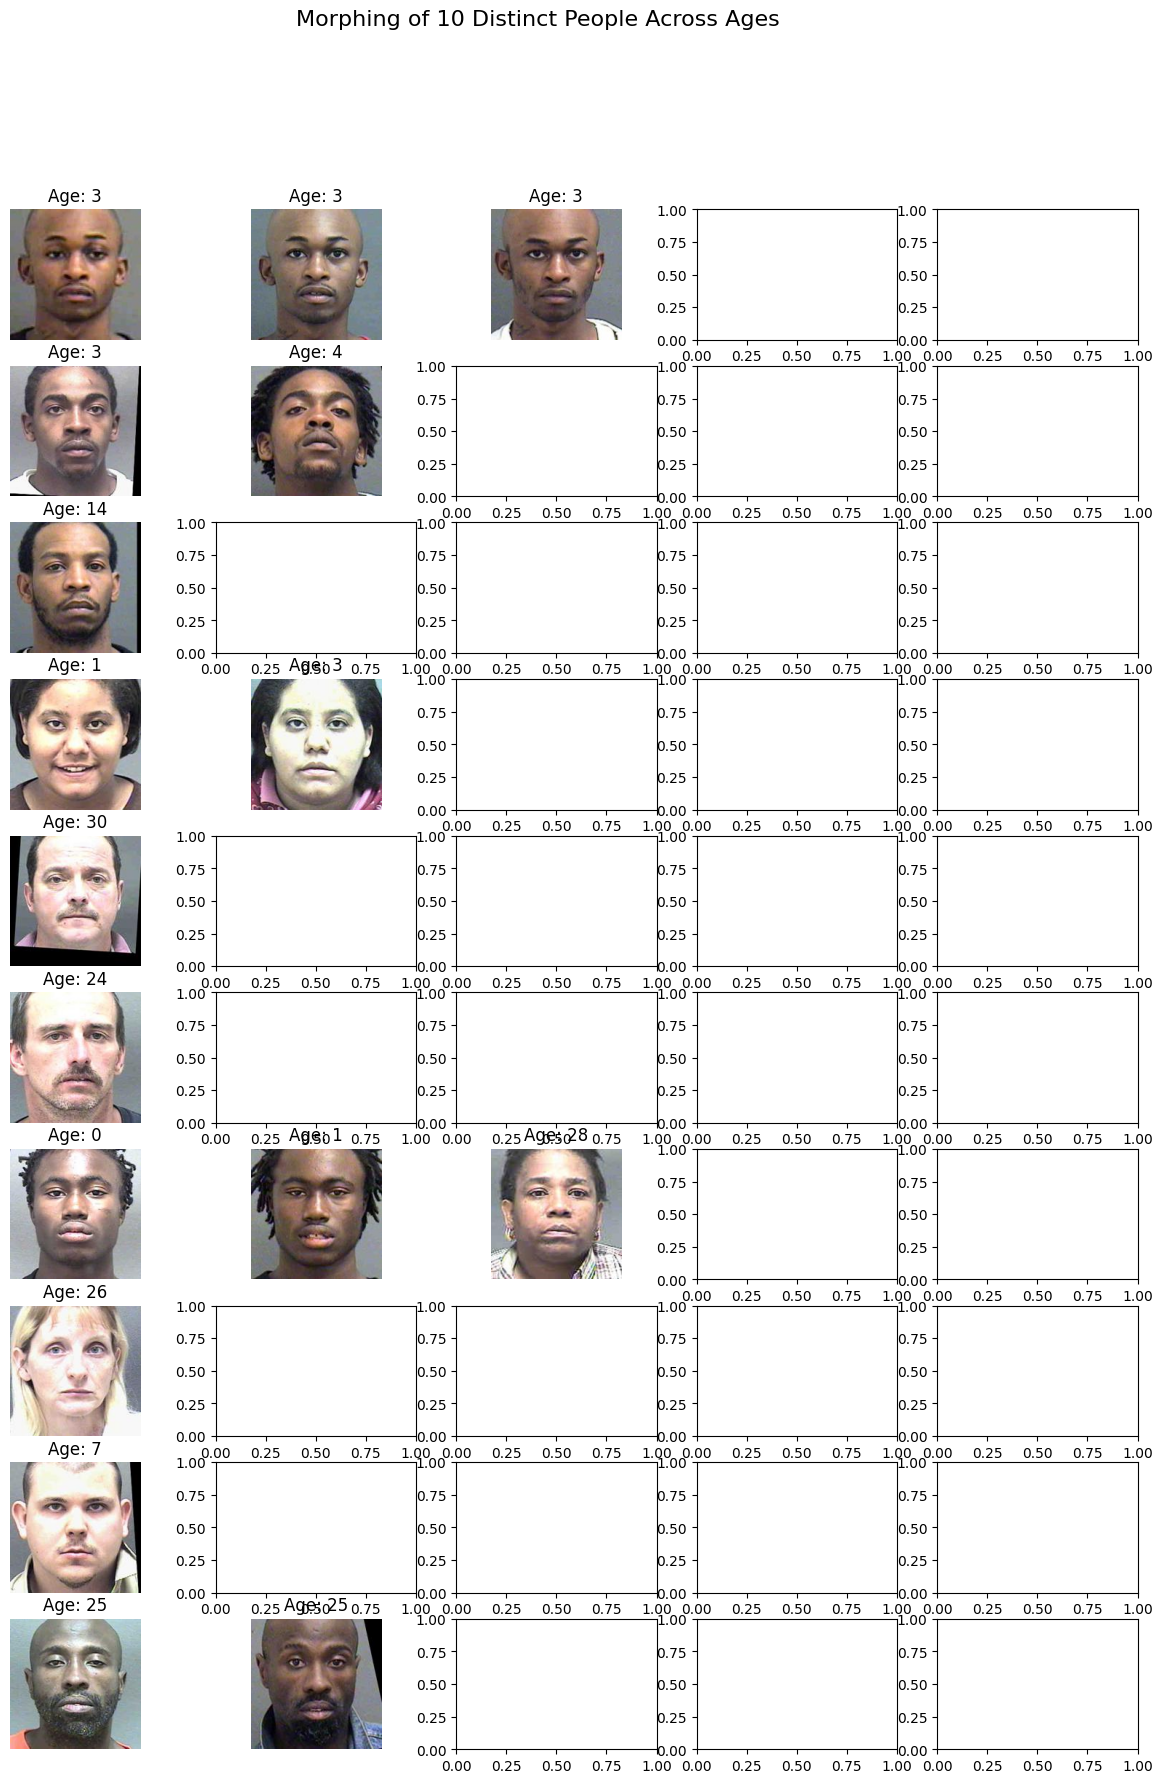

In [5]:
unique_people = train_labels["person_id"].unique()
sampled_people = unique_people[:10]

fig, axes = plt.subplots(10, 5, figsize=(15, 20))

for i, person_id in enumerate(sampled_people):
    person_images = train_labels[train_labels["person_id"] == person_id].sort_values("age")

    selected_images = person_images.iloc[:5]

    for j, (_, row) in enumerate(selected_images.iterrows()):
        img_path = os.path.join(dataset_path, "Images", "Train", row["filename"])
        img = Image.open(img_path).convert("RGB")

        axes[i, j].imshow(img)
        axes[i, j].axis("off")
        axes[i, j].set_title(f"Age: {row['age']}")

plt.suptitle("Morphing of 10 Distinct People Across Ages", fontsize=16)
plt.show()